## ECG Anomaly Detection Using Autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
dataframe = pd.read_csv('data\ecg.csv',header=None)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
data = dataframe.values

In [4]:
data.shape

(4998, 141)

In [5]:
# The last column contains the labels
labels = data[:, -1]

features = data[:, 0:-1]

xtrain, xtest, ytrain, ytest = train_test_split(
    features, labels, test_size=0.4, random_state=55
)

In [6]:
xval,xtest,yval,ytest=train_test_split(
    xtest, ytest, test_size=0.5, random_state=56)

In [7]:
ytest.shape

(1000,)

Normalizing data using min max scalar


In [8]:
min_vals = tf.reduce_min(xtrain)
max_vals = tf.reduce_max(xtrain)

xtrain = (xtrain - min_vals) / (max_vals - min_vals)
xval = (xval - min_vals) / (max_vals - min_vals)
xtest = (xtest - min_vals) / (max_vals - min_vals)

xtrain = tf.cast(xtrain, tf.float32)
xtest = tf.cast(xtest, tf.float32)
xval=tf.cast(xval, tf.float32)

In [9]:
ytrain.shape

(2998,)

In [10]:
ytrain = ytrain.astype(bool)
ytest = ytest.astype(bool)
yval = yval.astype(bool)

normal_xtrain = xtrain[ytrain]
normal_xval = xval[yval]

anomalous_xtrain = xtrain[~ytrain]
anomalous_xval = xval[~yval]

Plotting a normal ECG. 

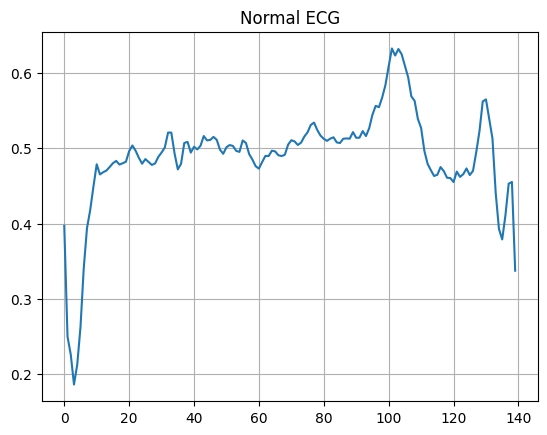

In [11]:
plt.grid()
plt.plot(np.arange(140), normal_xtrain[0])
plt.title("Normal ECG")
plt.show()

Plotting an anomalous ECG.

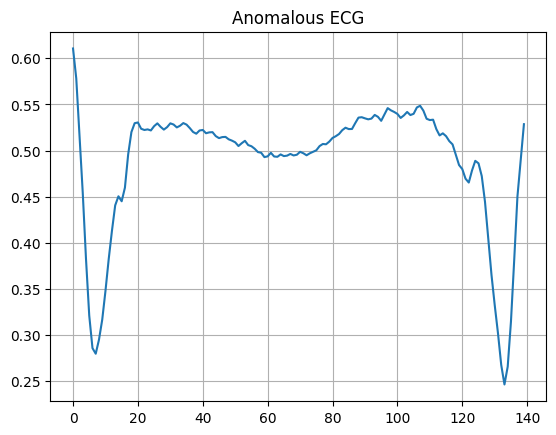

In [12]:
plt.grid()
plt.plot(np.arange(140), anomalous_xtrain[0])
plt.title("Anomalous ECG")
plt.show()

### Build the model

In [13]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu"),
          layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [14]:
autoencoder.compile(optimizer='nadam', loss='mae')

In [15]:
history = autoencoder.fit(normal_xtrain, normal_xtrain, 
          epochs=100, 
          batch_size=512,
          validation_data=(xval, xval),
          shuffle=True)

Epoch 1/100
4/4 [==============================] - 2s 68ms/step - loss: 0.0512 - val_loss: 0.0459
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0465 - val_loss: 0.0441
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0450 - val_loss: 0.0433
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0439 - val_loss: 0.0426
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0426 - val_loss: 0.0418
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0412 - val_loss: 0.0411
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 0.0397 - val_loss: 0.0403
Epoch 8/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0381 - val_loss: 0.0395
Epoch 9/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0365 - val_loss: 0.0387
Epoch 10/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0348 - val_loss: 0.0379
Epoch 11/100
4/4 [=

Epoch 84/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0155 - val_loss: 0.0260
Epoch 85/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0155 - val_loss: 0.0260
Epoch 86/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0154 - val_loss: 0.0259
Epoch 87/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0154 - val_loss: 0.0259
Epoch 88/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0154 - val_loss: 0.0259
Epoch 89/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0154 - val_loss: 0.0259
Epoch 90/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0154 - val_loss: 0.0258
Epoch 91/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0154 - val_loss: 0.0259
Epoch 92/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0154 - val_loss: 0.0260
Epoch 93/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0157 - val_loss: 0.0260
Epoch 94/1

### Plotting loss for different epochs

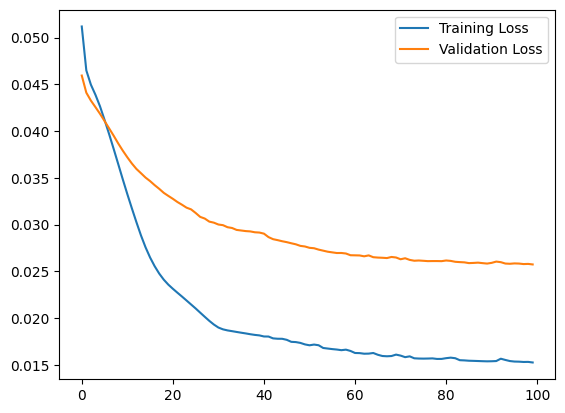

In [16]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

#### plotting a normal ECG from the validataion set, the reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error.

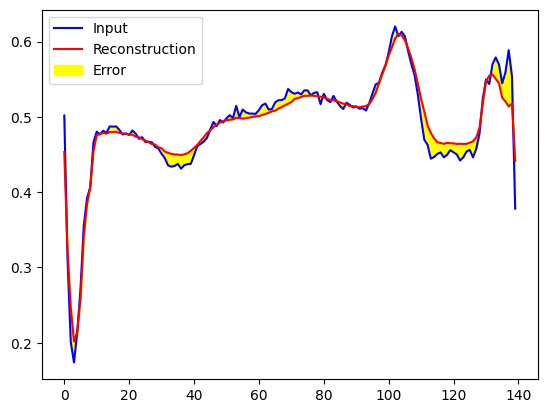

In [17]:
encoded_imgs = autoencoder.encoder(normal_xval).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_xval[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_xval[0], color='yellow' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

#### Creating a similar plot for an anomalous validation example.

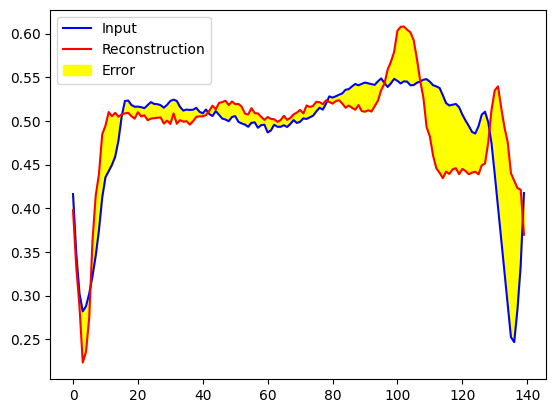

In [18]:
encoded_imgs = autoencoder.encoder(anomalous_xval).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_xval[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_xval[0], color='yellow' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

#### Plotting the reconstruction error on normal ECGs from the training set

55/55 [==============================] - 0s 1ms/step


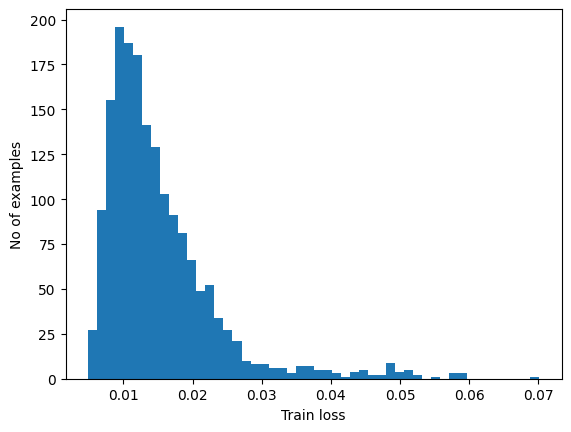

In [19]:
reconstructions = autoencoder.predict(normal_xtrain)
train_loss = tf.keras.losses.mae(reconstructions, normal_xtrain)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

#### Plotting the reconstruction error on anomolous ECGs from the training set

40/40 [==============================] - 0s 1ms/step


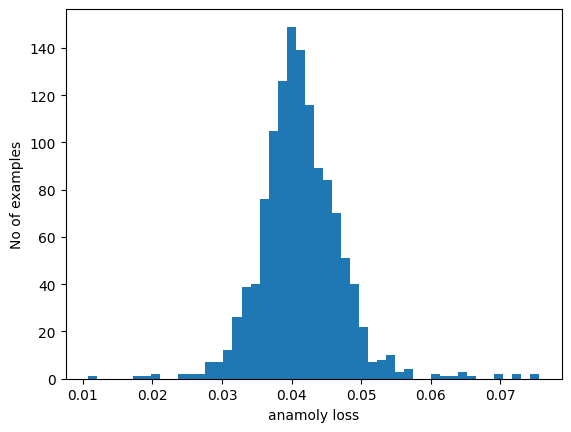

In [20]:
reconstructions = autoencoder.predict(anomalous_xtrain)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_xtrain)

plt.hist(test_loss, bins=50)
plt.xlabel("anamoly loss")
plt.ylabel("No of examples")
plt.show()

In [27]:
#From the above train loss and anomaly loss plots thresold(hyper parameter) is taken.
threshold = 0.03

Now we can classify an ECG as an anomaly if the reconstruction error is greater than the threshold.

### Predictions on validation data

In [28]:
reconstructions = autoencoder(xval)
loss = tf.keras.losses.mae(reconstructions, xval)
preds = tf.math.less(loss, threshold)

print("Accuracy = {}".format(accuracy_score(yval, preds)))
print("Precision = {}".format(precision_score(yval, preds)))
print("Recall = {}".format(recall_score(yval, preds)))

Accuracy = 0.967
Precision = 0.9878472222222222
Recall = 0.9563025210084034


The threshold value is finalized to 0.03 from the train loss and anomaly loss plots and validation accuracy.

### Predictions on test data

In [29]:
reconstructions = autoencoder(xtest)
loss = tf.keras.losses.mae(reconstructions, xtest)
preds = tf.math.less(loss, threshold)

print("Accuracy = {}".format(accuracy_score(ytest, preds)))
print("Precision = {}".format(precision_score(ytest, preds)))
print("Recall = {}".format(recall_score(ytest, preds)))

Accuracy = 0.963
Precision = 0.9857142857142858
Recall = 0.9500860585197934
